# X-Ray maps

This notebooks has simple workflows with chemical X-ray data obtained with an electron probe microanalyzer (EMPA), with both EDS (energy-dispersive) and WDS (wavelength-dispersive) spectometers. 

Data is from a high-grade _crd-grt granulite with spl-sill_ from the **Araçuaí Orogen**, SE Brazil. Full description of this sample is described by Schiavetti _et al._ (2025).

Worklows are:
* load and display individual X-ray maps
* train a machine-learning model to classify minerals
* load mineral chemistry standards and use a cluster algorithm to classify all pixels

Classes
* XrayMap

---

to do
* read and review
* setup analysis


#### setup

In [32]:
# importing libs
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# utils
from src.xraymap import XrayMap # map Class
from src.utils import get_dirs # function that reads directories

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

# setting up plots
plt.rcParams["figure.figsize"] = (16,8)

In [4]:
# using Al as an example

element = "Al"
al_map = XrayMap(element=element)
print("We created: ", al_map, "!")

Al.csv found!
We created:  <src.xraymap.XrayMap object at 0x7f1eb9ab9eb0> !


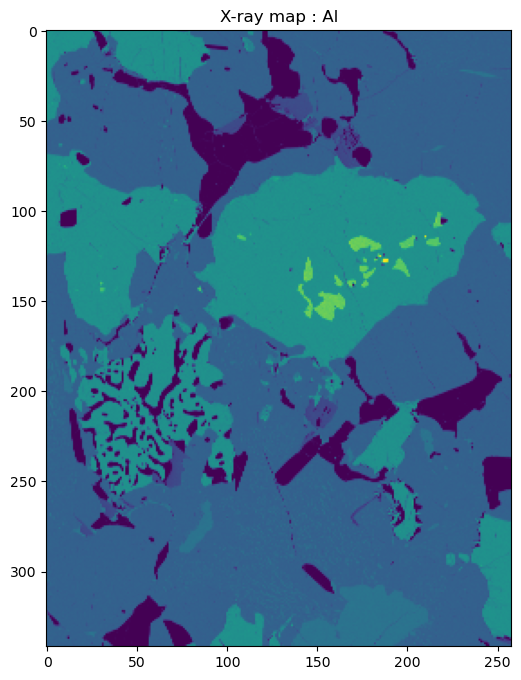

In [5]:
al_map.show_map()

**loading all maps using our class**

In [30]:
# load all X-Ray maps

def load_maps(elements):
  maps = []
  for el in elements:
    try:
      # print('{a}.csv'.format(a=el))
      map_el = XrayMap(element=el)
      maps.append(map_el)
    
    except:
      print("error loading map")
  
  for x in maps:
    x.xray_data = x.data.to_numpy().astype(np.float32) / 255.0

  return maps

ELEMENTS = ["Al","Ba","Ca","Cl","Cr","Fe","K","Mg","Mn","Mn","Na","P","S","Si","Ti","Zn","Zr"]
all_maps = load_maps(ELEMENTS)

Al.csv found!
Ba.csv found!
Ca.csv found!
Cl.csv found!
Cr.csv found!
Fe.csv found!
K.csv found!
Mg.csv found!
Mn.csv found!
Mn.csv found!
Na.csv found!
P.csv found!
S.csv found!
Si.csv found!
Ti.csv found!
Zn.csv found!
Zr.csv found!


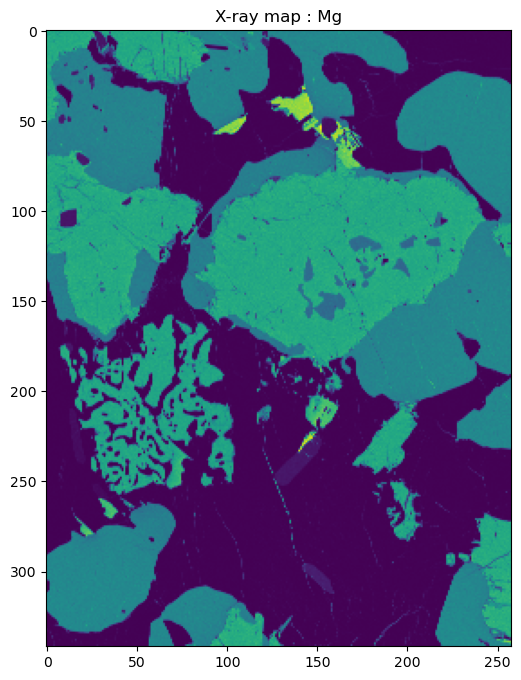

In [31]:
all_maps[7].show_map()